In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Load the dataset
# Make sure the CSV file is in the same folder as your notebook
file_path = 'Crop_recommendation.csv'
df = pd.read_csv(file_path)

# --- Initial Data Inspection ---

# 1. View the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# 2. Get the total number of rows and columns
print("\nShape of the dataset (rows, columns):")
print(df.shape)

# 3. Get a summary of the dataset, including data types and non-null values
print("\nDataset information:")
df.info()

First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Shape of the dataset (rows, columns):
(2200, 8)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        22

In [2]:
# --- Exploring the Crop Distribution ---

# 1. Get the unique crop names and their counts
print("Number of instances for each crop:")
print(df['label'].value_counts())

# 2. Get summary statistics for all the columns
# This will give us the mean, median, min, max, etc. for each feature
print("\nDescriptive statistics for the dataset:")
print(df.describe())

Number of instances for each crop:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

Descriptive statistics for the dataset:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.00000

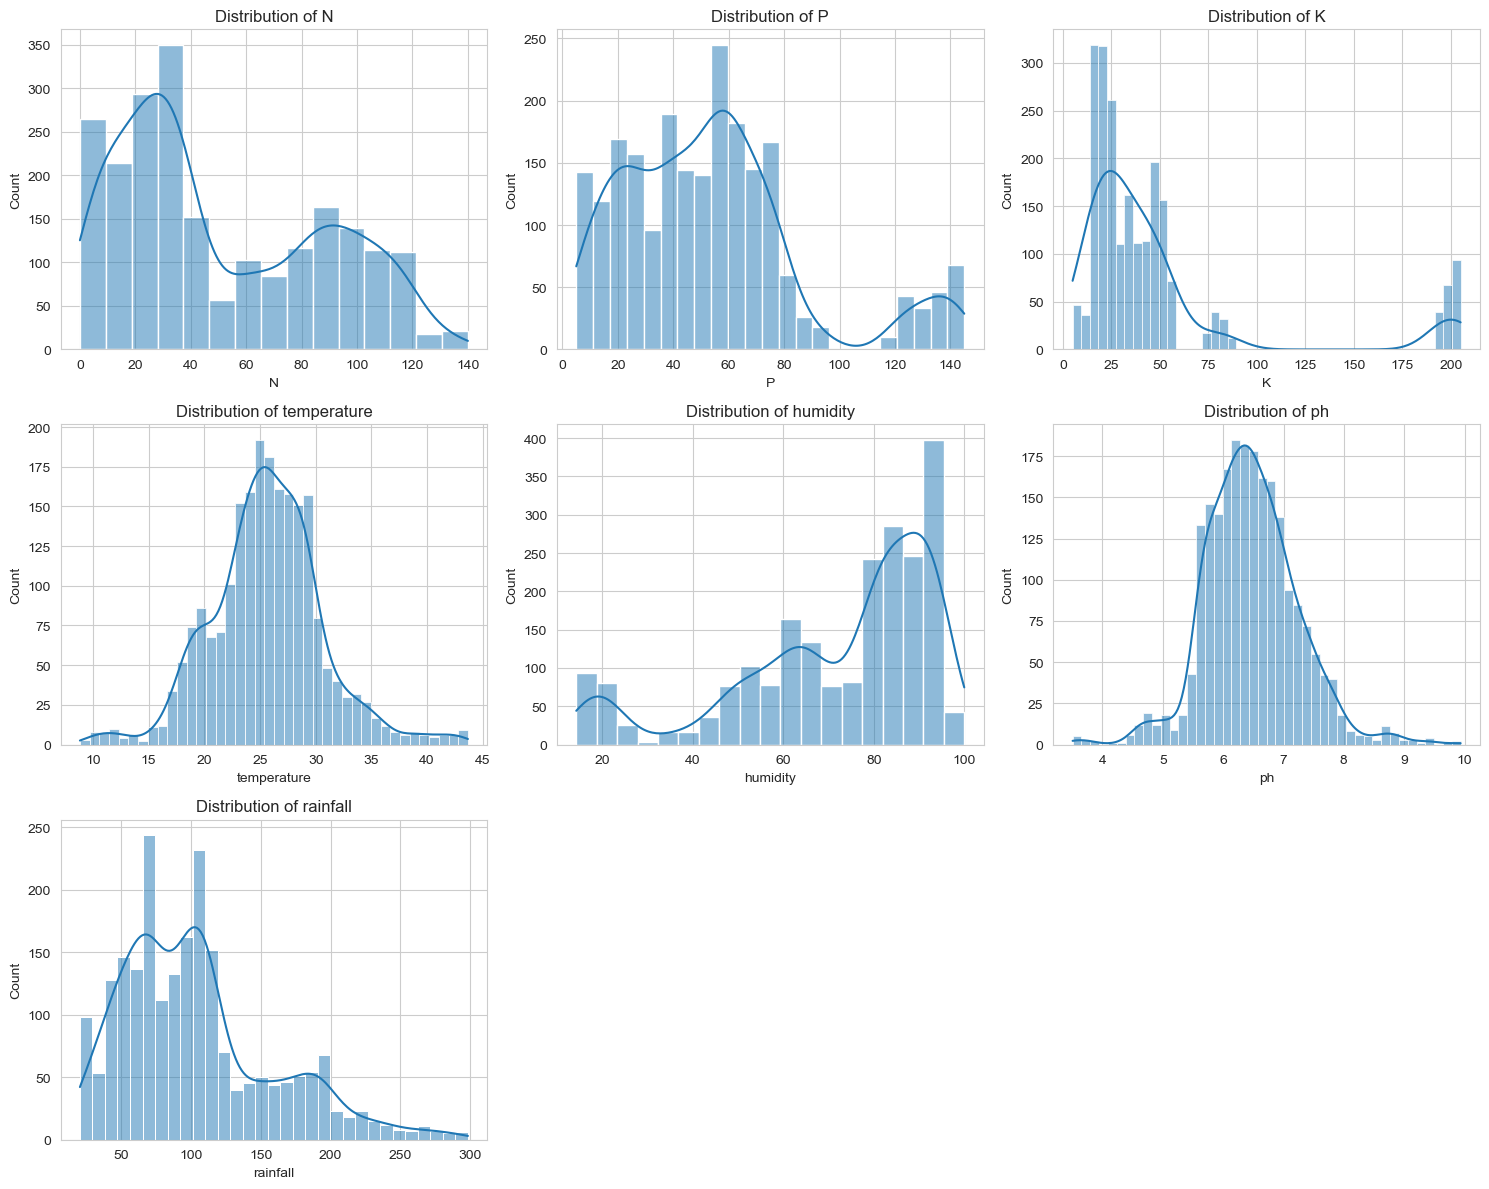

In [3]:
# --- Visualizing the Data Distributions ---

# Create a figure to hold the subplots
plt.figure(figsize=(15, 12))

# List of columns to plot
columns_to_plot = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Loop through each column and create a histogram with a density plot
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [4]:
# --- Analyzing Average Conditions for Each Crop ---

# Group the data by crop label and calculate the mean for each feature
crop_summary = df.groupby('label').mean()

# Display the summary table
print("Average Soil and Weather Conditions for Each Crop:")
print(crop_summary)

Average Soil and Weather Conditions for Each Crop:
                  N       P       K  temperature   humidity        ph  \
label                                                                   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   


In [5]:
# --- Preparing the Data ---

# 1. Separate the features (X) from the target (y)
# X contains all the columns except 'label'
X = df.drop('label', axis=1)
# y contains only the 'label' column
y = df['label']

# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

# 3. Check the shape of the new datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [6]:
# --- Building and Training the Random Forest Model ---

# 1. Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Create an instance of the model
# We use random_state for reproducibility, just like before
model = RandomForestClassifier(random_state=42)

# 3. Train the model on the training data
# This is where the model "learns"
model.fit(X_train, y_train)

print("The model has been trained successfully!")

The model has been trained successfully!


In [7]:
# --- Evaluating the Model ---

# 1. Import the metrics we need
from sklearn.metrics import accuracy_score, classification_report

# 2. Make predictions on the test data
y_pred = model.predict(X_test)

# 3. Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 4. Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 99.32%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1

In [8]:
# --- Making a Prediction on New Data ---

import numpy as np

# Create a sample data point with your own values
# The order is important: N, P, K, temperature, humidity, ph, rainfall
sample_data = np.array([[83, 45, 60, 28.5, 90.1, 6.8, 110.2]])

# Use the trained model to make a prediction
prediction = model.predict(sample_data)

print(f"The recommended crop for these conditions is: {prediction[0]}")

The recommended crop for these conditions is: papaya


C:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
# --- Yield Prediction: Loading the Data ---

# Load the second dataset
yield_df = pd.read_csv('crop_production.csv')

# --- Initial Data Inspection ---

# 1. View the first 5 rows
print("First 5 rows of the yield dataset:")
print(yield_df.head())

# 2. Get the total number of rows and columns
print("\nShape of the yield dataset:")
print(yield_df.shape)

# 3. Get a summary of the dataset
print("\nYield dataset information:")
yield_df.info()

First 5 rows of the yield dataset:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  

Shape of the yield dataset:
(246091, 7)

Yield dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -

In [10]:
# --- Yield Prediction: Data Cleaning and Feature Engineering ---

# 1. Drop rows with missing 'Production' values
yield_df.dropna(subset=['Production'], inplace=True)

# 2. Create the 'Yield' column (Production per Area)
# We also remove rows where Area is 0 to avoid division errors
yield_df = yield_df[yield_df['Area'] > 0]
yield_df['Yield'] = yield_df['Production'] / yield_df['Area']

# 3. Check the dataset again after cleaning
print("Shape after cleaning and adding Yield column:")
print(yield_df.shape)

print("\nFirst 5 rows with the new 'Yield' column:")
print(yield_df.head())

Shape after cleaning and adding Yield column:
(242361, 8)

First 5 rows with the new 'Yield' column:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production     Yield  
0             Arecanut  1254.0      2000.0  1.594896  
1  Other Kharif pulses     2.0         1.0  0.500000  
2                 Rice   102.0       321.0  3.147059  
3               Banana   176.0       641.0  3.642045  
4            Cashewnut   720.0       165.0  0.229167  


In [11]:
# --- Yield Prediction: Exploration and Encoding ---

# 1. Explore the most common crops in the dataset
print("Top 10 most frequent crops:")
print(yield_df['Crop'].value_counts().head(10))

# 2. Encode the categorical (text) columns into numbers
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
categorical_cols = ['State_Name', 'District_Name', 'Season', 'Crop']
encoder = LabelEncoder()

for col in categorical_cols:
    yield_df[col] = encoder.fit_transform(yield_df[col])

# 3. Check the dataframe again to see the encoded columns
print("\nFirst 5 rows after encoding:")
print(yield_df.head())

Top 10 most frequent crops:
Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: count, dtype: int64

First 5 rows after encoding:
   State_Name  District_Name  Crop_Year  Season  Crop    Area  Production  \
0           0            427       2000       1     2  1254.0      2000.0   
1           0            427       2000       1    74     2.0         1.0   
2           0            427       2000       1    95   102.0       321.0   
3           0            427       2000       4     7   176.0       641.0   
4           0            427       2000       4    22   720.0       165.0   

      Yield  
0  1.594896  
1  0.500000  
2  3.147059  
3  3.642045  
4  0.229167  


In [12]:
# --- Yield Prediction: Splitting the Data ---

# 1. Separate the features (X) from the target (y)
X = yield_df.drop(['Yield', 'Production', 'Area'], axis=1)
y = yield_df['Yield']

# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

# 3. Check the shape of the new datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (193888, 5)
Shape of X_test: (48473, 5)


In [13]:
# --- Yield Prediction: Building the Model ---

# 1. Import the RandomForestRegressor and the evaluation metric
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 2. Create an instance of the model
# Using n_estimators=20 and min_samples_leaf=10 for faster training on this large dataset
model_yield = RandomForestRegressor(n_estimators=20, min_samples_leaf=10, random_state=42, n_jobs=-1)

# 3. Train the model
print("Training the yield prediction model... This may take a few moments.")
model_yield.fit(X_train, y_train)
print("Training complete.")

# 4. Make predictions on the test data
y_pred_yield = model_yield.predict(X_test)

# 5. Evaluate the model using the R-squared score
r2 = r2_score(y_test, y_pred_yield)
print(f"\nModel R-squared Score: {r2:.4f}")

Training the yield prediction model... This may take a few moments.
Training complete.

Model R-squared Score: 0.7192


In [14]:
# --- Saving the Trained Models ---
import joblib

# Save the Crop Recommendation model
joblib.dump(model, 'crop_recommendation_model.pkl')

# Save the Yield Prediction model
joblib.dump(model_yield, 'yield_prediction_model.pkl')

print("Models saved successfully!")

Models saved successfully!
